In [1]:
import pandas as pd


In [4]:
movies_df =pd.read_csv("movies.csv")

In [5]:
movies_df.shape

(9742, 3)

In [6]:
ratings_df =pd.read_csv("ratings.csv")

In [8]:
ratings_df.shape

(100836, 4)

In [10]:
movies_df.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [11]:
ratings_df.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [12]:
movies_df.max()

movieId                                       193609
title      À nous la liberté (Freedom for Us) (1931)
genres                                       Western
dtype: object

In [13]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [14]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [15]:
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

In [16]:
merged_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [18]:
merged_df["userId"].max()

610

In [19]:
rating_counts = merged_df.groupby('title').size()


In [20]:
max_rated_movie = rating_counts.idxmax()
max_ratings = rating_counts.max()

In [21]:
print(f"The movie with the maximum number of user ratings is: {max_rated_movie} with {max_ratings} ratings.")

The movie with the maximum number of user ratings is: Forrest Gump (1994) with 329 ratings.


In [28]:
print(merged_df.columns)

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')


In [29]:
average_rating = merged_df.loc[merged_df['title'] == 'Terminator 2: Judgment Day (1991)', 'rating'].mean()


In [30]:
average_rating

3.970982142857143

<Axes: title={'center': 'Distribution of User Ratings for "Fight Club (1999)"'}, ylabel='Frequency'>

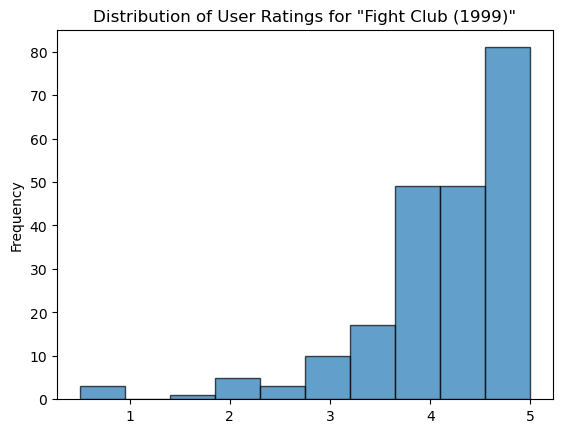

In [34]:
merged_df.loc[merged_df['title'] == 'Fight Club (1999)', 'rating'].plot(kind='hist', bins=10, edgecolor='k', alpha=0.7, title='Distribution of User Ratings for "Fight Club (1999)"', xlabel='User Rating', ylabel='Frequency')


In [35]:
# Count the number of ratings for each movie
rating_counts = merged_df.groupby('title').size()

# Sort by the number of ratings in descending order and get the top 5
top_5_movies = rating_counts.sort_values(ascending=False).head(5)

# List of movies to check
movies_to_check = ['Pulp Fiction (1994)', 'Bad Boys (1995)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']

# Filter out movies that are in the top 5
top_5_movies_list = top_5_movies.index.tolist()
movies_in_top_5 = [movie for movie in movies_to_check if movie in top_5_movies_list]

print(movies_in_top_5)


['Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


In [36]:
# Filter for Sci-Fi genre
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

# Count the number of ratings for each Sci-Fi movie
sci_fi_rating_counts = sci_fi_movies.groupby('title').size()

# Sort by the number of ratings in descending order and get the third most popular
third_most_popular_sci_fi = sci_fi_rating_counts.sort_values(ascending=False).index[2]

print(third_most_popular_sci_fi)


Jurassic Park (1993)


In [38]:
highest_imdb_movieId = merged_df.loc[merged_df['rating'].idxmax(), 'movieId']

print(highest_imdb_movieId)


1


In [43]:
import pandas as pd

# Check the column names in merged_df
print(merged_df.columns)

# Ensure 'genres' and 'imdb_rating' columns exist
if 'genres' in merged_df.columns and 'imdb_rating' in merged_df.columns:
    # Filter for Sci-Fi genre
    sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', na=False)]

    # Ensure there are Sci-Fi movies in the DataFrame
    if not sci_fi_movies.empty:
        # Find the movieId with the highest IMDb rating among Sci-Fi movies
        highest_imdb_movieId = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax(), 'movieId']
        print(highest_imdb_movieId)
    else:
        print("No Sci-Fi movies found in the dataset.")
else:
    print("Required columns 'genres' or 'imdb_rating' are missing in the DataFrame.")


Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')
Required columns 'genres' or 'imdb_rating' are missing in the DataFrame.


In [47]:
from bs4 import BeautifulSoup


In [48]:
from bs4 import SoupStrainer

In [49]:
from bs4 import Tag


In [50]:
from bs4 import NavigableString


In [51]:
from bs4 import BeautifulSoup


In [53]:
import scrapper  # This imports scrapper.py as a module
df = scrapper.df
print(df)

ImportError: cannot import name 'FILL_IN_THE_BLANK' from 'bs4' (C:\Users\MANOJ\anaconda3\lib\site-packages\bs4\__init__.py)